Link al repositorio de Github: https://github.com/100461170/AA_practica_1_grupo_10

# **1.- Primeros pasos: EDA**
Antes de proceder con el análisis de datos necesitamos primeramente obtener esos datos. Actualmente nuestro conjunto de datos incluye un montón de datos irrelevantes así que vamos a conseguir el conjunto que necesitamos.




## 1.1.- Obtener los datos

In [ ]:
from google.colab import files
import pandas as pd

# Sube el archivo wind_ava.csv desde tu ordenador
#uploaded = files.upload()

# También es una opción montar el drive para incluir el archivo desde ahí
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import re

# Leer el archivo CSV utilizando Pandas
df = pd.read_csv("/content/drive/MyDrive/AA_P1_Grupo10/wind_ava.csv")

# Vamos a eliminar los datos de las centrales que no queremos
patron = r'.*\.13$'
columnas_a_mantener = []
for column in df.columns:
  if column == "datetime" or column == "energy":
    columnas_a_mantener.append(column)
  if re.match(patron, column):
    columnas_a_mantener.append(column)
df = df[columnas_a_mantener]

## 1.2 - Analizar los datos
Ahora que ya tenemos los datos de interés que buscamos, podemos empezar a analizarlos

In [ ]:
# Veamos que aspecto tienen nuestros datos
df.head()

,datetime,energy,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,...,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
0,2005-01-02 18:00:00,402.71,2.510824e+06,9.186295,13.527577,1.386937e+06,2.344111,2.432983,-0.757587,-1.922799,...,280.473098,281.042026,281.462478,-0.057958,-0.138650,284.684755,0.404731,-5.927092,-1.780562,-4.443617
1,2005-01-03 00:00:00,696.80,2.513173e+06,8.849569,6.896412,1.153526e+06,2.343719,2.432838,-1.412620,-1.403011,...,278.286616,280.747406,281.486541,-0.103576,-0.083050,284.667948,0.404920,-5.913881,-3.743344,-3.129469
2,2005-01-03 06:00:00,1591.15,2.509627e+06,7.924080,4.774439,1.098754e+06,2.343300,2.432704,-2.290185,-0.754580,...,277.206490,280.114863,281.487095,-0.165721,-0.036241,284.651914,0.405704,-5.908272,-5.097203,-1.157748
3,2005-01-03 12:00:00,1338.62,2.510571e+06,6.922709,0.000000,1.076021e+06,2.342830,2.432514,-3.497855,1.271028,...,280.926600,279.991138,281.472435,-0.275550,0.098192,284.636266,0.403967,-5.961995,-4.500835,1.502478
4,2005-01-03 18:00:00,562.50,2.505664e+06,6.646282,0.000000,1.070830e+06,2.342437,2.432369,-0.971249,0.553060,...,277.363875,280.576898,281.473265,-0.056553,0.041844,284.620232,0.403808,-5.987860,-3.392324,2.131114


In [ ]:
# Y veamos informacion de nuestro dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4748 entries, 0 to 4747
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    4748 non-null   object 
 1   energy      4748 non-null   float64
 2   p54.162.13  4748 non-null   float64
 3   p55.162.13  4748 non-null   float64
 4   cape.13     4748 non-null   float64
 5   p59.162.13  4748 non-null   float64
 6   lai_lv.13   4748 non-null   float64
 7   lai_hv.13   4748 non-null   float64
 8   u10n.13     4748 non-null   float64
 9   v10n.13     4748 non-null   float64
 10  sp.13       4748 non-null   float64
 11  stl1.13     4748 non-null   float64
 12  u10.13      4748 non-null   float64
 13  v10.13      4748 non-null   float64
 14  t2m.13      4748 non-null   float64
 15  stl2.13     4748 non-null   float64
 16  stl3.13     4748 non-null   float64
 17  iews.13     4748 non-null   float64
 18  inss.13     4748 non-null   float64
 19  stl4.13     4748 non-null  

Como podemos ver, tenemos un total de **4748 instancias**, indexadas además por la fecha en la que se tomaron las medidas. Tenemos una columna energía que es en este caso nuestra label y luego tenemos un total de **22 atributos**, en nuestro caso los de la central de Sotavento. Como vemos, en principio **no hay ningún valor faltante o nulo para ningún atributo** lo que nos ayuda ya que no hay necesidad de limpiar los datos en ese aspecto.

Vemos también que todos nuestros atributos son **atributos numéricos**

In [ ]:
# Gracias a que nuestros atributos son numéricos, podemos desglosar un mini-análisis rapidamente
# de manera que podamos ver algunos datos como percentiles, la media, desviacion estandar, etc...
df.describe()

,energy,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,sp.13,...,t2m.13,stl2.13,stl3.13,iews.13,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13
count,4748.000000,4.748000e+03,4748.000000,4748.000000,4.748000e+03,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,...,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000,4748.000000
mean,693.126247,2.489477e+06,16.008810,31.166541,1.706692e+06,2.815222,2.576284,0.386215,0.120528,97820.301287,...,285.689253,286.663838,286.665988,0.074229,0.049971,286.668152,0.413677,-5.908467,0.447175,0.328204
std,665.531609,4.482599e+04,6.552216,121.758977,1.466953e+06,0.397377,0.116434,3.100583,3.016766,713.689654,...,6.163483,5.547947,4.582827,0.367013,0.379014,3.552873,0.007602,0.094359,4.841730,4.667552
min,0.010000,2.358748e+06,1.650268,0.000000,5.610341e+04,2.323973,2.425866,-8.619823,-8.867441,93770.364813,...,268.970603,275.461648,278.389271,-1.714897,-1.438829,280.875389,0.364805,-6.130465,-11.879053,-13.043453
25%,144.170000,2.458543e+06,11.203264,0.000000,6.563209e+05,2.425944,2.461630,-1.950008,-2.050920,97459.369264,...,281.458939,282.287394,282.689506,-0.126880,-0.148495,283.405549,0.410027,-5.977599,-3.836853,-3.256194
50%,465.305000,2.490478e+06,15.543441,1.004148,1.239176e+06,2.758857,2.560520,0.048820,-0.191853,97861.147677,...,285.395453,286.191880,286.204914,0.010551,-0.003569,286.591659,0.410917,-5.947220,0.282399,-0.389416
75%,1089.375000,2.525134e+06,20.214077,14.143328,2.296548e+06,3.205385,2.688526,2.641779,2.016289,98251.478418,...,289.740438,291.345311,290.989045,0.232378,0.172325,290.024705,0.417070,-5.858848,4.187953,3.614395
max,2792.550000,2.580387e+06,39.230807,2311.662152,1.110694e+07,3.450745,2.762992,12.974802,11.699814,99917.733093,...,305.000640,299.556292,295.639998,2.842552,2.366522,292.808658,0.428914,-5.618172,18.964137,16.913033


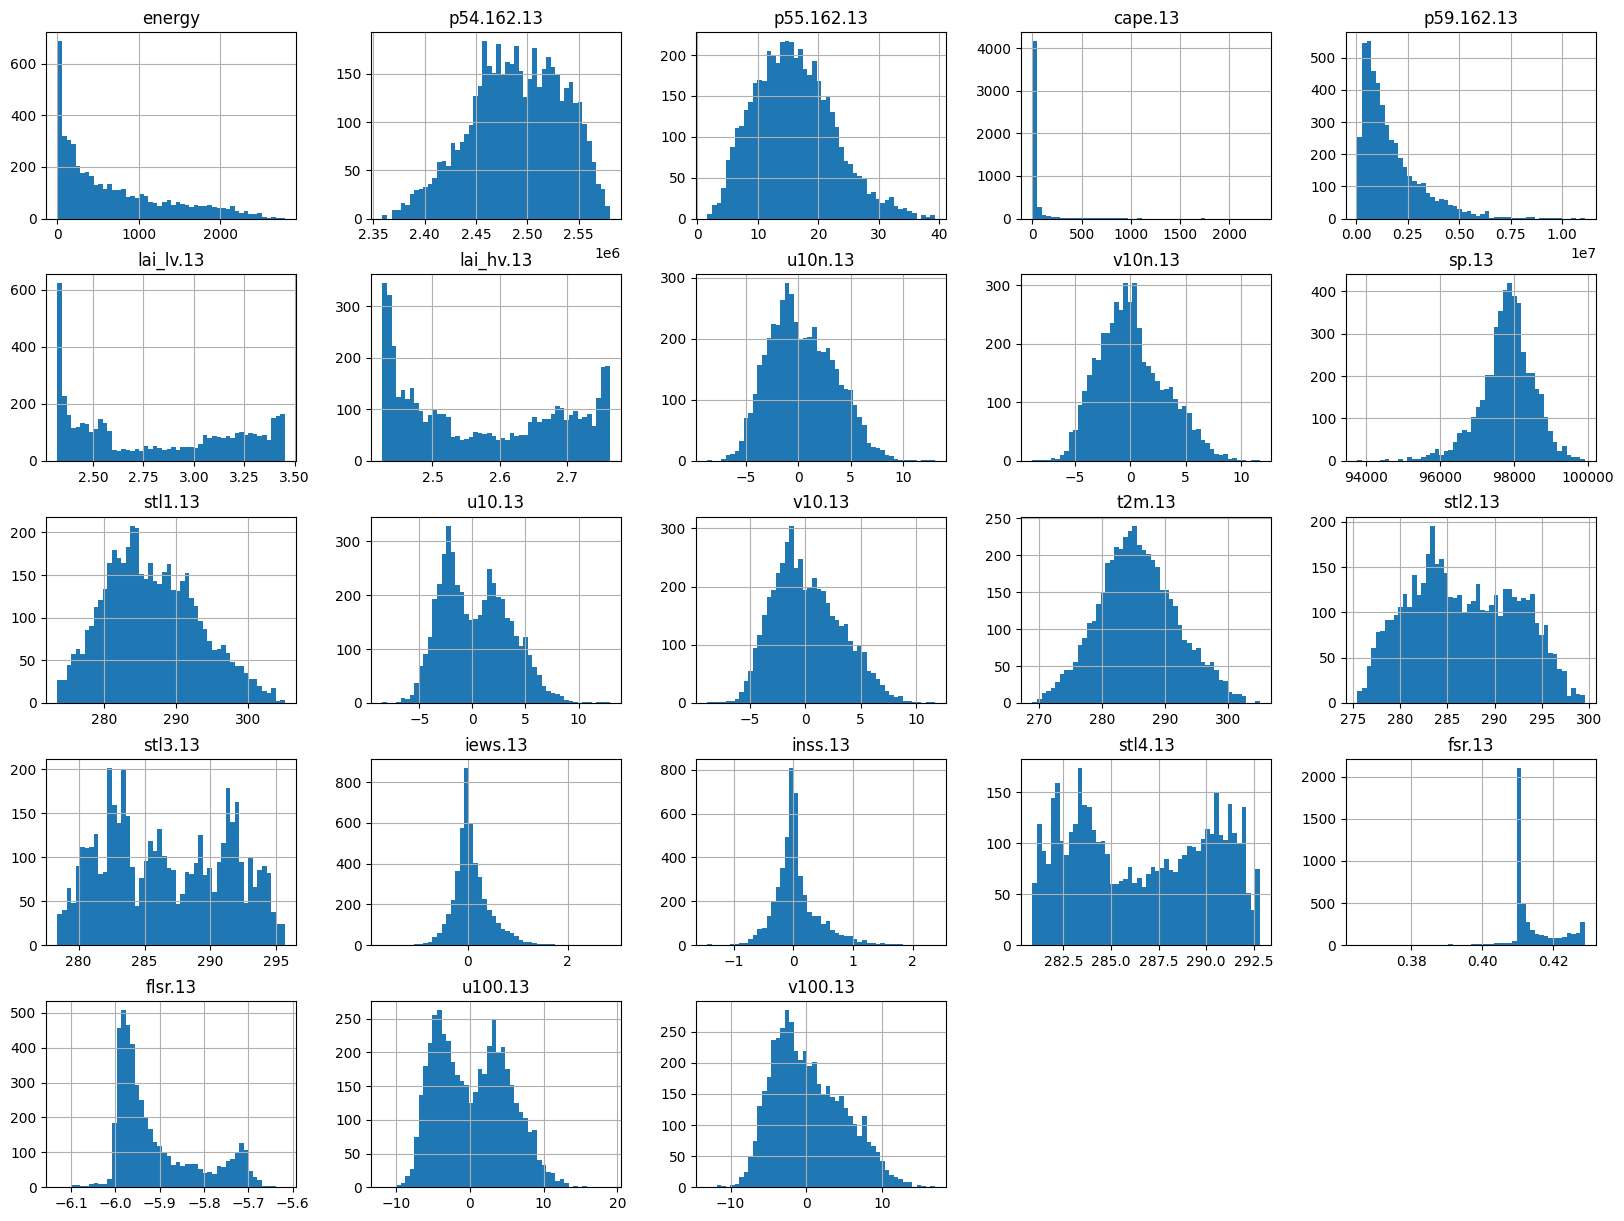

In [ ]:
# Si queremos verlo más visualmente, podemos hacer histogramas gracias a Matplotlib
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

Gracias a estos histogramas podemos ver de un vistazo la distribución de valores de cada variable, lo que nos permite ver que **no tenemos tampoco problemas de columnas constantes** `(NOTA PARA TOM: la verdad es que el tema de cape, Convective available potential energy, me escama porque en un gran porcentaje es 0, pero luego a veces hay valores de 1000, lo que pasa es que como no sé que coño es el cape este pues no se decir si es normal o no)`. Tal como estamos viendo hay que calcular un valor de energía en función de estos atributos por lo que estamos ante un claro ejemplo de **problema de regresión**.

Aunque podemos ver de un vistazo la distribución de los datos con los histogramas, vamos a ver cuantos de ellos se ajustan bien a una distribución normal, ya que esto es importante a la hora de posteriormente elegir un escalador para KNN



In [ ]:
from scipy.stats import shapiro

contador = 0;
for column in df.columns:
  if column != "energy" and column != "datetime":
    datos_a_analizar = df[column]
    stat, p_valor = shapiro(datos_a_analizar)
    print(p_valor, column)
    if p_valor > 0.05:
      print("La columna ", column, "se ajusta a una distribucion normal")
      contador += 1
print("El porcentaje de los atributos numéricos que se ajusta a una normal es:", (contador / 23) * 100, "%" )

1.7065282812239588e-22 p54.162.13
2.5856623894706284e-22 p55.162.13
0.0 cape.13
0.0 p59.162.13
0.0 lai_lv.13
0.0 lai_hv.13
3.647634503046425e-20 u10n.13
3.705658829928578e-22 v10n.13
1.3244920672622345e-26 sp.13
4.122985433887708e-22 stl1.13
8.328572340565827e-27 u10.13
3.4598252856192125e-23 v10.13
4.244360418681481e-10 t2m.13
1.4129861889426462e-28 stl2.13
8.29991008606276e-37 stl3.13
1.5336931432342258e-40 iews.13
1.401298464324817e-45 inss.13
4.121218783579287e-42 stl4.13
0.0 fsr.13
0.0 flsr.13
6.924946682728044e-30 u100.13
1.590732069069467e-28 v100.13
El porcentaje de los atributos numéricos que se ajusta a una normal es: 0.0 %


Como vemos tras realizar el test de Shapiro, los datos no se ajustan a una normal, así que utilizaremos un escalador robusto como scaler en KNN.

Vamos ahora a realizar diagramas de caja que nos permitan ver los datos atípicos


Veamos ahora qué atributos tienen una correlación más fuerte con la energía

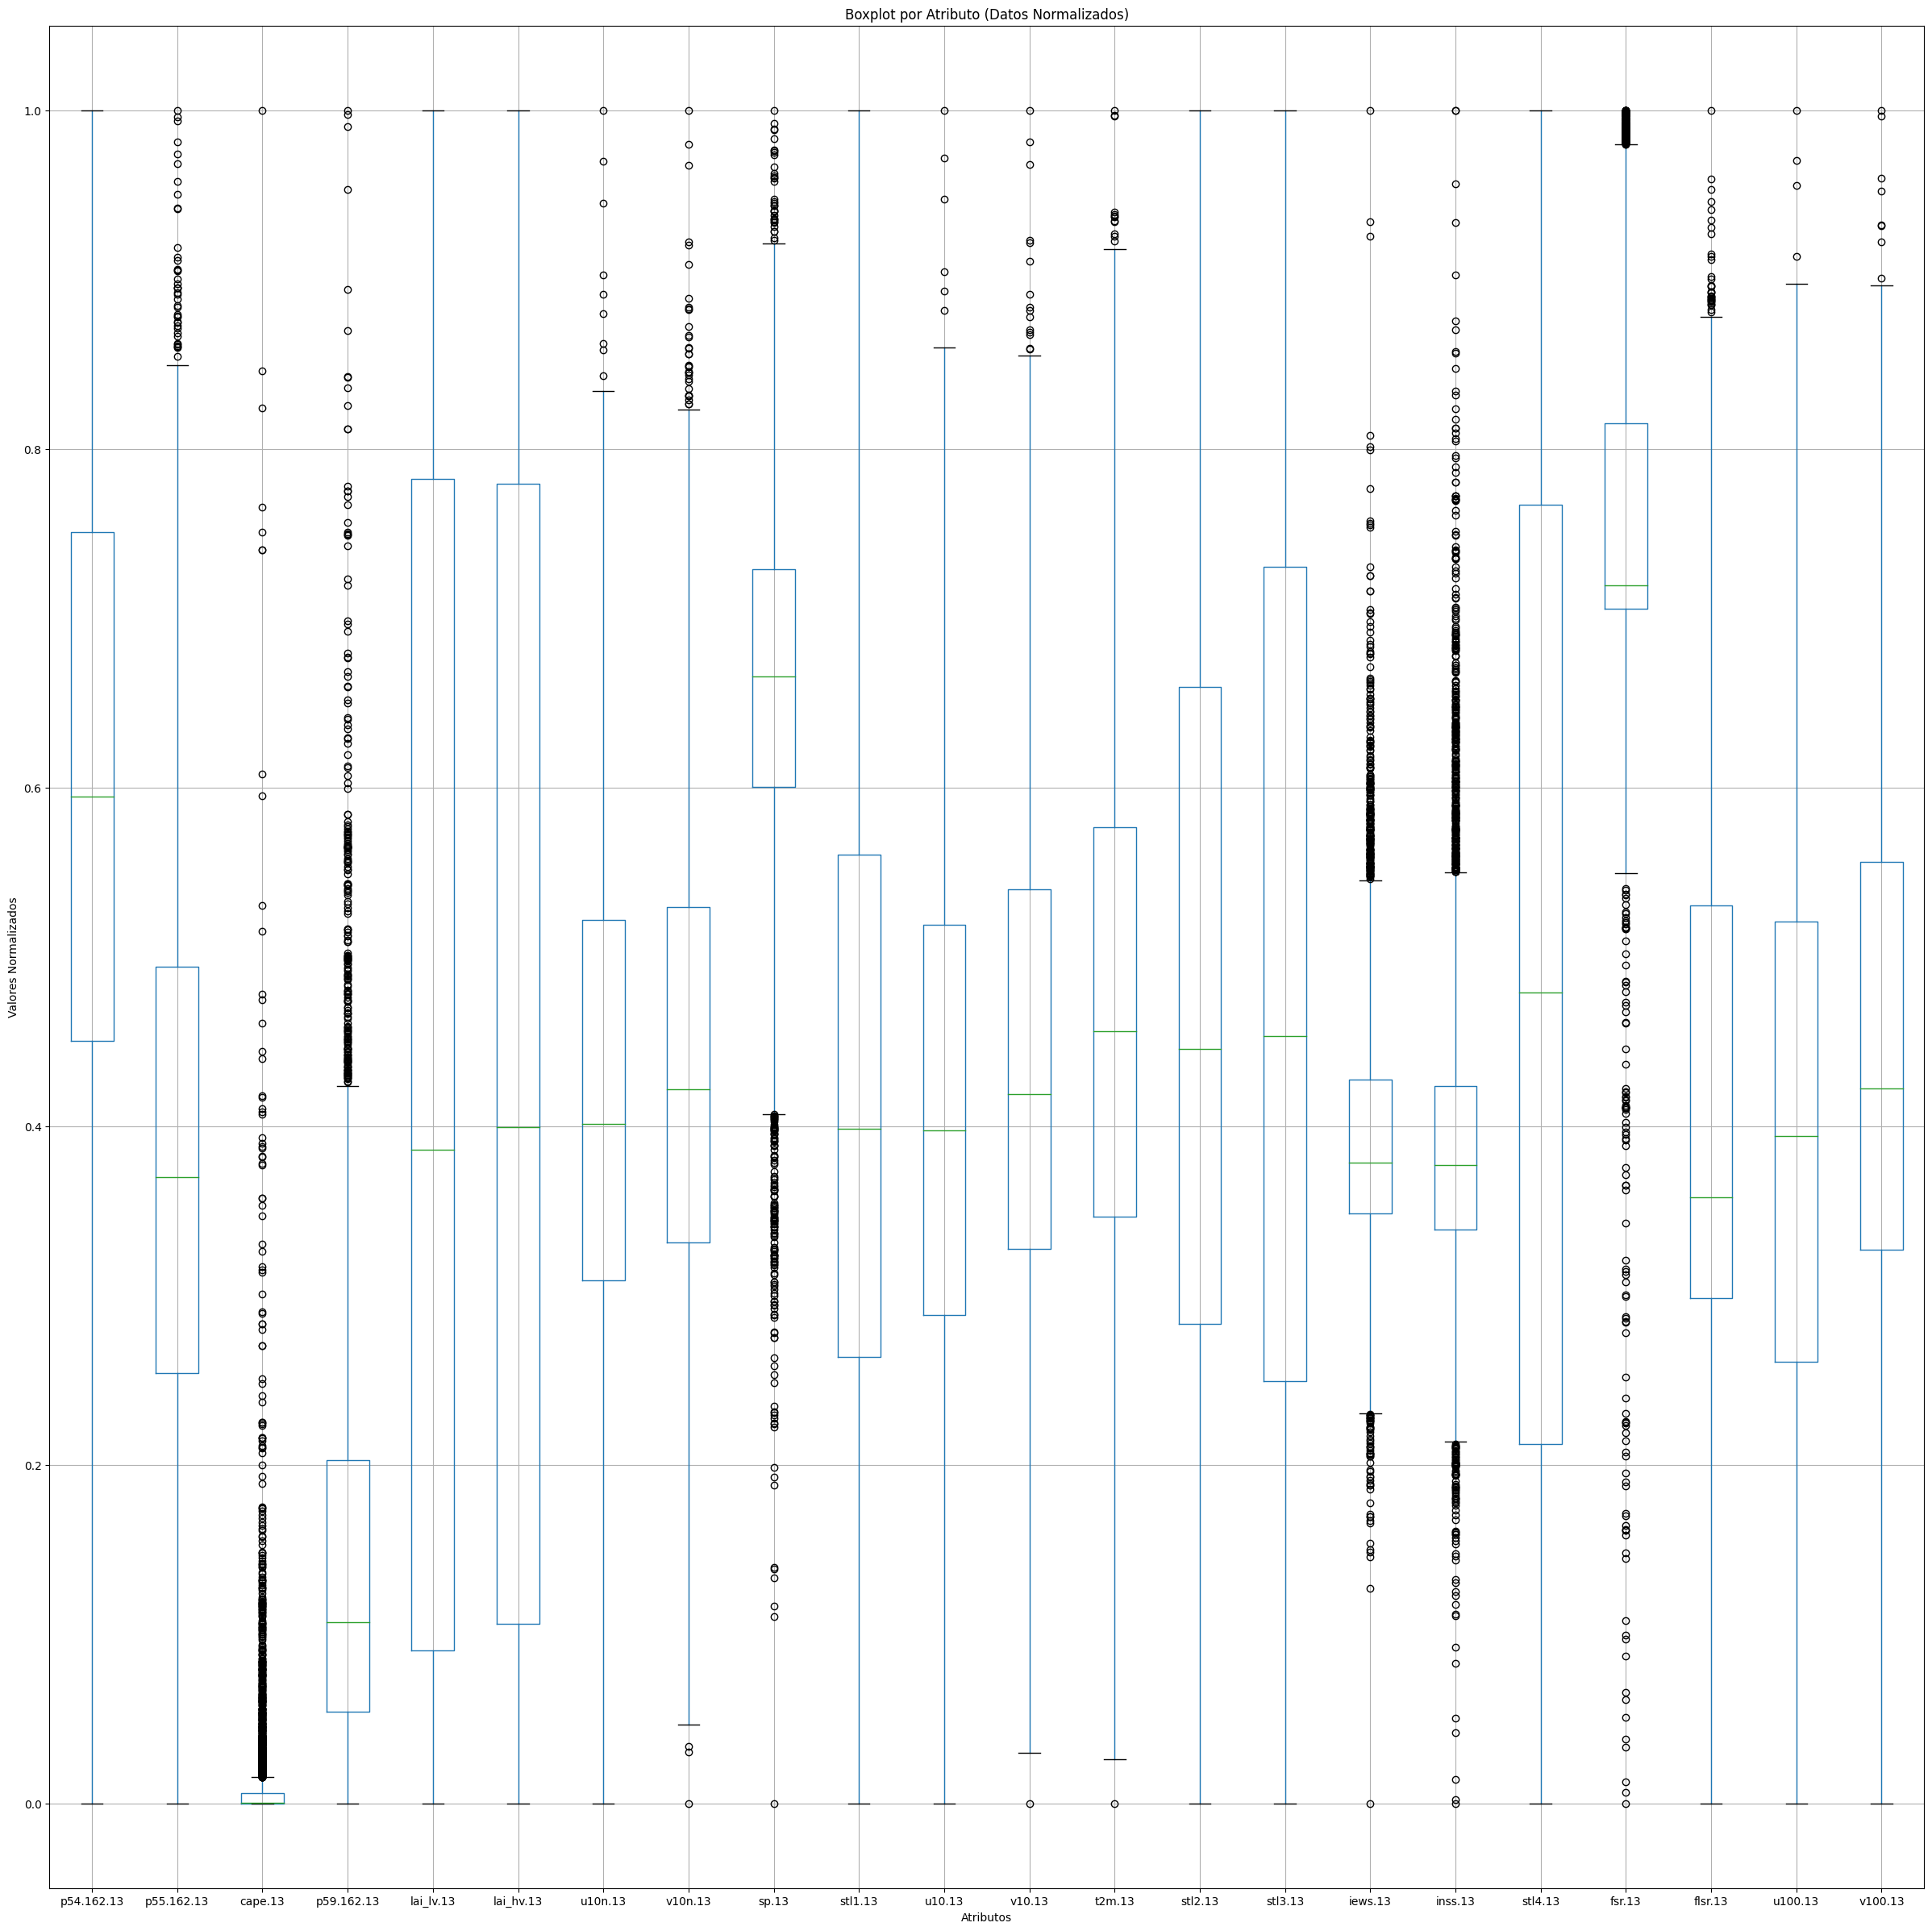

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Normalizar los datos
scaler = MinMaxScaler()

a_mantener = []
for column in df.columns:
  if column != "datetime" and column != "energy":
    a_mantener.append(column)
df_copia = df[a_mantener]

df_normalized = pd.DataFrame(scaler.fit_transform(df_copia), columns=df_copia.columns)

# Crear los boxplots con los datos normalizados
df_normalized.boxplot(figsize=(30,30))

# Agregar título y etiquetas de ejes
plt.title('Boxplot por Atributo (Datos Normalizados)')
plt.xlabel('Atributos')
plt.ylabel('Valores Normalizados')

# Mostrar el boxplot
plt.show()

In [ ]:

for column in df_copia.columns:
  columna = df_copia[column]
  # Calcular el primer y tercer cuartil (Q1 y Q3)
  Q1 = columna.quantile(0.25)
  Q3 = columna.quantile(0.75)

  # Calcular el rango intercuartil (IQR)
  IQR = Q3 - Q1

  # Definir los límites del rango aceptable para no considerar valores atípicos
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR

  # Contar los valores atípicos
  valores_atipicos = (columna < limite_inferior) | (columna > limite_superior)
  porcentaje_valores_atipicos = (valores_atipicos.sum() / len(columna)) * 100

  print(f"Porcentaje de datos atípicos en '{columna.name}': {porcentaje_valores_atipicos:.2f}%")



Porcentaje de datos atípicos en 'p54.162.13': 0.00%
Porcentaje de datos atípicos en 'p55.162.13': 0.86%
Porcentaje de datos atípicos en 'cape.13': 14.68%
Porcentaje de datos atípicos en 'p59.162.13': 4.53%
Porcentaje de datos atípicos en 'lai_lv.13': 0.00%
Porcentaje de datos atípicos en 'lai_hv.13': 0.00%
Porcentaje de datos atípicos en 'u10n.13': 0.19%
Porcentaje de datos atípicos en 'v10n.13': 0.76%
Porcentaje de datos atípicos en 'sp.13': 3.69%
Porcentaje de datos atípicos en 'stl1.13': 0.00%
Porcentaje de datos atípicos en 'u10.13': 0.13%
Porcentaje de datos atípicos en 'v10.13': 0.34%
Porcentaje de datos atípicos en 't2m.13': 0.27%
Porcentaje de datos atípicos en 'stl2.13': 0.00%
Porcentaje de datos atípicos en 'stl3.13': 0.00%
Porcentaje de datos atípicos en 'iews.13': 6.17%
Porcentaje de datos atípicos en 'inss.13': 9.08%
Porcentaje de datos atípicos en 'stl4.13': 0.00%
Porcentaje de datos atípicos en 'fsr.13': 8.00%
Porcentaje de datos atípicos en 'flsr.13': 0.70%
Porcentaje d

In [ ]:
# Para ver la correlación, usamos .corr
df.corr()["energy"].sort_values(ascending=False)

<ipython-input-12-d63b03f51474>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["energy"].sort_values(ascending=False)


energy        1.000000
p59.162.13    0.446710
inss.13       0.345784
iews.13       0.323979
v10n.13       0.310246
v100.13       0.302290
v10.13        0.301370
u10.13        0.244619
u10n.13       0.241616
u100.13       0.236615
fsr.13        0.232329
flsr.13       0.151233
p55.162.13    0.000785
stl4.13      -0.046865
cape.13      -0.047995
t2m.13       -0.161310
stl3.13      -0.165994
sp.13        -0.191786
stl2.13      -0.192833
stl1.13      -0.197850
lai_lv.13    -0.211480
lai_hv.13    -0.213400
p54.162.13   -0.239832
Name: energy, dtype: float64

Como podemos ver, no hay ningún valor que tenga una correlación particularmente fuerte con la energía. Por otro lado, es cierto que hay atributos que tienen una correlación muy pequeña o casi nula con nuestra variable objetivo pero hemos decidido no obviarlos e incluir todos los atributos para las construcciones de los modelos

`// NOTA PARA TOM: Seguramente habría que hacer más análisis y demás pero lo voy a dejar aquí de momento porque tampoco es que los datos estos ayuden mucho. Si fueran cosas comunes podriamos ver que datos serian mas importantes y hacer graficos y eso pero ahora mismo me da un poco de pereza porque son cosas tan especificas y complejas que no se que datos son mas importantes y eso. Volveremos aqui y profundizaremos mas el analisis mas adelante, tampoco es que cuente mucho este apartado `

# **2.- Elección de métricas**

En este apartado vamos a realizar un pequeño análisis para la elección de las métricas que usaremos tanto para la outer evaluation como para la inner evaluation, de manera que podamos ser lo más efectivos posibles a la hora de construir nuestros modelos.

## 2.1.- Outer Evaluation

Debido a la naturaleza de las mediciones, que se realizan de manera periódica, y que están ordenadas temporalmente según la fecha en la que se tomaron, hemos decidido que lo óptimo es utilizar **validación cruzada para series temporales** (TimeSeriesSplit), en nuestro caso hemos decidido usar 3 splits.

Por otro lado debemos decidir la propia métrica de evaluación. Dado que se trata de un problema claro de regresión vamos a decantarnos por **MSE** (Mean Squared Error), o, en su defecto usaremos **RMSE** (Root Mean Squared Error) si queremos obtener el error en la misma medida que la variable objetivo, para poder comprender mejor el error.

`// NOTA PARA TOM: Este párrafo igual lo cambiamos más adelante cuando ya hayamos hecho pruebas y veamos qué es lo que vamos a usar e incluso ampliar esto en función de lo que vayamos descubriendo y usando al final, hasta que realmente no nos pongamos en esa situación no podemos saberlo bien`



## 2.2.- Inner Evaluation

En cuanto a la técnica de evaluación para encontrar los hiperparámetros óptimos para cada modelo, vamos a utilizar, en principio, ya sea GridSearch o RandomSearch utilizando a su vez TimeSeriesSplit. La elección de uno u otro método recaerá en el número de hiperparámetros a evaluar y el rango de valores de los mismos. Es decir, dependiendo del método que usemos para la construcción del modelo utilizaremos uno u otro.

`// NOTA PARA TOM: Lo mismo que arriba. Si luego cuando acabemos queremos ampliar el párrafo o poner la técnica que hemos usado para cada método de construcción del modelo pues lo hacemos, de momento no se puede decir mucho más`

# **3.- Construcción de modelos**

En este apartado utilizaremos distintos métodos para construir y evaluar diferentes modelos para este problema. Variaremos los hiperparámetros en cada método y realizaremos una evaluación acerca de cada método así como una comparación general entre los métodos, de manera que podamos elegir un modelo definitivo que nos proporcione los mejores resultados posibles.

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
# Estos son datos generales que vamos a usar para todos los
columnas_a_eliminar = ['energy', 'datetime', 'p55.162.13', 'stl4.13', 'cape.13']
X = df.drop(columns=columnas_a_eliminar)
y = df['energy']
tscv = TimeSeriesSplit(n_splits=3)

`// REVISAR TODO LO DE KNN Y ÁRBOLES Y COMPROBAR QUE LO QUE SE HA HECHO ES CORRECTO (EN PRINCIPIO TODO ESTÁ BIEN) `

## 3.1.- Primer método: KNN (K Nearest Neighbors)

### 3.1.1.- Técnica de escalado para los datos

Lo primero que vamos a hacer para este primer método va a ser elegir una técnica de escalado para los datos, ya que si no KNN no funcionará bien porque los distintos atributos tienen rangos de valores muy dispares. Para ello no vamos a elegir una al azar sino que vamos a evaluar una serie de modelos probando las 3 técnicas: MinMax, Standarization y Robust Scaler.

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
import numpy as np

scores = {}

# Primer método: MinMaxScaler
pipeline_minmax = make_pipeline(MinMaxScaler(), KNeighborsRegressor())
scores_minmax = cross_val_score(pipeline_minmax, X, y, cv=tscv, scoring='neg_mean_squared_error')
scores['MinMaxScaler'] = np.sqrt(-scores_minmax).mean()

# Segundo método: Standard Scaler
pipeline_std = make_pipeline(StandardScaler(), KNeighborsRegressor())
scores_std = cross_val_score(pipeline_std, X, y, cv=tscv, scoring='neg_mean_squared_error')
scores['StandardScaler'] = np.sqrt(-scores_std).mean()

# Tercer método: RobustScaler
pipeline_robust = make_pipeline(RobustScaler(), KNeighborsRegressor())
scores_robust = cross_val_score(pipeline_robust, X, y, cv=tscv, scoring='neg_mean_squared_error')
scores['RobustScaler'] = np.sqrt(-scores_robust).mean()

for name, score in scores.items():
  print(f"{name}: {score}")

MinMaxScaler: 463.4089163048133
StandardScaler: 429.07066872368387
RobustScaler: 426.5385927979323


Como podemos ver, los escaladores robustos funcionan mejor, lo que tiene sentido puesto que ya dijimos que nuestros datos no se asemejan a distribuciones normales y por tanto es necesario estandarizarlos. En la prueba StandardScaler funciona un pelín mejor, por tanto, este será nuestra elección.

### 3.1.2.- Evaluación con hiperparámetros por omisión

Lo primero que tenemos que hacer es hacer una evaluación sin el uso de evaluación de hiperparámetros. Lo que sí usaremos será TimeSplitSeries para la outer evaluation. Si bien podríamos reutilizar parte del código de la elección de escalador, vamos a hacer como si no existiera porque el enunciado indica que son dos apartados separados.

In [ ]:
import time

# Evaluación
knn_model_eval =  make_pipeline(RobustScaler(), KNeighborsRegressor())
start_time = time.time()
knn_scores = cross_val_score(knn_model_eval, X, y, cv=tscv, scoring='neg_mean_squared_error')
end_time = time.time()
elapsed_time = end_time - start_time
print("El Error Medio del modelo KNN sin HPO es: ", np.sqrt(-knn_scores).mean())
print("El tiempo necesario para entrenar el modelo es: ", elapsed_time, "segundos")


El Error Medio del modelo KNN sin HPO es:  426.5385927979323
El tiempo necesario para entrenar el modelo es:  0.11075687408447266 segundos


### 3.1.3.- Evaluación con evaluación de hiperparámetros

Ahora vamos a entrenar un modelo pero usando además HPO

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


# Usaremos los mismos conjuntos X e y ya especificados antes, así como el mismo
# tscv para la outer evaluation.

# Para la cross_validation de HPO
param_grid = {
    'kneighborsregressor__n_neighbors': list(range(2, 30, 2)),
    'kneighborsregressor__weights': ['uniform', 'distance'],
    'kneighborsregressor__metric': ['euclidean', 'manhattan', 'chebyshev'],
    'kneighborsregressor__p': [1, 2]  # Solo se aplica si se usa la distancia de Minkowski
}
knn_model_hpo = make_pipeline(RobustScaler(), KNeighborsRegressor())

start_time = time.time()
# Hacemos nested cross validation
# Hacemos la evaluacion inner usando un RandomizedSearch con un budget de 20
regr = RandomizedSearchCV(estimator=knn_model_hpo, param_distributions=param_grid,
                                   n_iter=20, scoring='neg_mean_squared_error',
                                   cv=tscv, random_state=42)

regr.fit(X, y)
print("Best params", regr.best_params_);

# Hacemos la outer evaluation
knn_scores_hpo = cross_val_score(regr,
                            X, y,
                            scoring='neg_mean_squared_error',
                            cv = tscv)
end_time = time.time()
elapsed_time = end_time - start_time
knn_hpo_rmse = np.sqrt(-knn_scores_hpo)
print("El error de media es ", knn_hpo_rmse.mean())
print("El tiempo necesario para entrenar el modelo es: ", elapsed_time, "segundos")

Best params {'kneighborsregressor__weights': 'distance', 'kneighborsregressor__p': 1, 'kneighborsregressor__n_neighbors': 16, 'kneighborsregressor__metric': 'manhattan'}
El error de media es  407.4956607015945
El tiempo necesario para entrenar el modelo es:  15.605453491210938 segundos


### 3.1.4.- Comparación del modelo con un modelo dummy

In [ ]:
from sklearn.dummy import DummyRegressor

# Crear el modelo DummyRegressor que predice la media
dummy_model = DummyRegressor(strategy="mean")

# Realizar la validación cruzada
dummy_scores = cross_val_score(dummy_model, X, y, cv=tscv, scoring='neg_mean_squared_error')
dummy_rmse = np.sqrt(-dummy_scores)
print("Error del modelo dummy:", dummy_rmse.mean())
print("Relative Root Mean Squared Error entre HPO y dummy", knn_hpo_rmse.mean() / dummy_rmse.mean())

Error del modelo dummy: 668.9181131869674
Relative Root Mean Squared Error entre HPO y dummy 0.621292570775805


Como vemos, el modelo KNN con HPO mejora al modelo dummy. Sin embargo, si vemos el RRMSE vemos que no es particularmente bajo, con un valor de 0.62

## 3.2.- Segundo método: árboles de regresión

`// REVISAR Y COMPLETAR MÁS TODO ESTE APARTADO. SE PODRÍAN DIBUJAR LOS ÁRBOLES DE CADA MODELO, TANTO EL POR OMISIÓN COMO EL HPO Y EXPLICARLOS UN POCO Y DEMÁS`

### 3.2.1.- Evaluación con hiperparámetros por omisión

In [ ]:
from sklearn import tree

tree_no_hpo = tree.DecisionTreeRegressor(random_state=42)

start_time = time.time()
tree_scores = cross_val_score(tree_no_hpo, X, y, cv=tscv, scoring='neg_mean_squared_error')
end_time = time.time()
elapsed_time = end_time - start_time
print("El error medio con árboles de regresión sin HPO es: ", np.sqrt(-tree_scores).mean())
print("El tiempo necesario para entrenar el modelo es: ", elapsed_time, "segundos")

El error medio con árboles de regresión sin HPO es:  526.7854779773328
El tiempo necesario para entrenar el modelo es:  0.21144604682922363 segundos


### 3.2.2.- Evaluación con HPO

In [ ]:
from scipy.stats import randint as sp_randint

tree_hpo = tree.DecisionTreeRegressor(random_state=42)

param_grid = {'max_depth': sp_randint (1, 16),
              'min_samples_split': sp_randint (1, 40),
              'min_samples_leaf': sp_randint (1, 20)}

start_time = time.time()
regr = RandomizedSearchCV(estimator=tree_hpo, param_distributions=param_grid,
                                   n_iter=20, scoring='neg_mean_squared_error',
                                   cv=tscv, random_state=42)

"""regr.fit(X, y)
print("Best params", regr.best_params_)"""

tree_scores_hpo = cross_val_score(regr,
                            X, y,
                            scoring='neg_mean_squared_error',
                            cv = tscv)
end_time = time.time()
elapsed_time = end_time - start_time
tree_hpo_rmse = np.sqrt(-tree_scores_hpo)
print("El error de media es ", tree_hpo_rmse.mean())
print("El tiempo necesario para entrenar el modelo es: ", elapsed_time, "segundos")


El error de media es  436.59463031759213
El tiempo necesario para entrenar el modelo es:  3.5289900302886963 segundos


### 3.2.3.- Comparación del modelo con un modelo dummy

In [ ]:
# Podemos reutilizar el modelo dummy que ya hemos usado en KNN
print("Error del modelo dummy:", dummy_rmse.mean())
print("Relative Root Mean Squared Error entre el modelo de árbol con HPO y dummy", tree_hpo_rmse.mean() / dummy_rmse.mean())

Error del modelo dummy: 668.9181131869674
Relative Root Mean Squared Error entre el modelo de árbol con HPO y dummy 0.6569081622071623


En general vemos que el modelo de árbol es un poco peor que el de KNN, como vemos el RRMSE es un poquito mas alto en este caso con un 0.66 frente al 0.62 de KNN

## 3.3.- Tercer método: regresión lineal estándar


En regresión lineal estándar vamos a realizar una primera evaluación con la regresión sin hiperparámetros y en HPO vamos a utilizar de hiperparámetro diferentes grados de polinomios. Como no tenemos muchos datos vamos a usar la solución analítica, puesto que no tardará demasiado.



### 3.3.1.- Evaluación con hiperparámetros por omisión


In [ ]:
from sklearn import linear_model
# regresion lineal normal
linear_reg = linear_model.LinearRegression()
start_time = time.time()
linear_reg_scores = cross_val_score(linear_reg, X, y, cv=tscv, scoring='neg_mean_squared_error')
end_time = time.time()
elapsed_time = end_time - start_time
linear_reg_rmse = np.sqrt(-linear_reg_scores)
print("El error de media es ", linear_reg_rmse.mean())
print("El tiempo necesario para entrenar el modelo es: ", elapsed_time, "segundos")


El error de media es  554.9309279772915
El tiempo necesario para entrenar el modelo es:  0.06839847564697266 segundos


### 3.3.2.- Evaluación con HPO


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

pipeline_regresion = make_pipeline(RobustScaler(), PolynomialFeatures(), LinearRegression())
param_grid = {
    'polynomialfeatures__degree': [1, 2, 3]  # Define diferentes grados de polinomios
}

start_time = time.time()
# Realiza una búsqueda de hiperparámetros con validación cruzada
regr = GridSearchCV(pipeline_regresion, param_grid, cv=tscv, scoring='neg_mean_squared_error')

# Hacemos la outer evaluation
regr_scores_hpo = cross_val_score(regr,
                            X, y,
                            scoring='neg_mean_squared_error',
                            cv = tscv)
end_time = time.time()
elapsed_time = end_time - start_time
regr_hpo_rmse = np.sqrt(-regr_scores_hpo)
print("El error de media es ", regr_hpo_rmse.mean())
print("El tiempo necesario para entrenar el modelo es: ", elapsed_time, "segundos")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeyboardInterrupt: 

### 3.3.2.- Comparación del modelo con un modelo dummy
Debido a que no hay hyper parámetros para la regresión lineal normal se procede a comparar directamente con nuestro modelo dummmy.

In [ ]:
print("Error del modelo dummy:", dummy_rmse.mean())
print("Relative Root Mean Squared Error entre el modelo de regresión lineal y dummy", linear_reg_rmse.mean() / dummy_rmse.mean())

Error del modelo dummy: 668.9181131869674
Relative Root Mean Squared Error entre el modelo de regresión lineal y dummy 0.8299152065508132


Se puede ver que este modelo tiene una mejora ínfima sobre el modelo dummy. Posibles razones para esto es que se este usando la regresión lineal estandar y el hecho de que no hay hyper parámetros para ajustar en este modelo.

## 3.4.- Cuarto método: Regresión lineal Ridge

### 3.4.1.- Evaluación con hiperparámetros por omisión


`// El alpha que puse aca es el valor que viene por defecto en SKlearn. No se si es el correcto`

In [ ]:
from sklearn import preprocessing
# regresion lineal ridge
ridge_reg = linear_model.Ridge(alpha=.5)
start_time = time.time()
ridge_reg_scores = cross_val_score(ridge_reg, X, y, cv=tscv, scoring='neg_mean_squared_error')
end_time = time.time()
elapsed_time = end_time - start_time
ridge_reg_rmse = np.sqrt(-ridge_reg_scores)
print("El error de media es ", ridge_reg_rmse.mean())
print("El tiempo necesario para entrenar el modelo es: ", elapsed_time, "segundos")

El error de media es  565.3128042281863
El tiempo necesario para entrenar el modelo es:  0.076416015625 segundos


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.0612e-16): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.61783e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


### 3.4.2.- Evaluación con HPO

`// No estoy seguro de la escala a usar en para el alpha`

In [ ]:
from scipy.stats import uniform
ridge_reg_hpo = linear_model.SGDRegressor()
param_grid = {'alpha': list(uniform.rvs(loc=0, scale=1, size=100))}
start_time = time.time()
regr = RandomizedSearchCV(estimator=ridge_reg_hpo, param_distributions=param_grid,
                                   n_iter=20, scoring='neg_mean_squared_error',
                                   cv=tscv, random_state=42)
"""regr.fit(X, y)
print("Best params", regr.best_params_)"""
ridge_hpo_scores = cross_val_score(regr, X, y, cv=tscv, scoring='neg_mean_squared_error')

end_time = time.time()
elapsed_time = end_time - start_time
ridge_hpo_rmse = np.sqrt(-ridge_reg_scores)
print("El error de media es ", ridge_hpo_rmse.mean())
print("El tiempo necesario para entrenar el modelo es: ", elapsed_time, "segundos")


El error de media es  565.3128042281863
El tiempo necesario para entrenar el modelo es:  6.024194002151489 segundos


### 3.4.2.- Comparación del modelo con un modelo dummy

In [ ]:
print("Error del modelo dummy:", dummy_rmse.mean())
print("Relative Root Mean Squared Error entre el modelo de regresión Ridge y dummy", ridge_hpo_rmse.mean() / dummy_rmse.mean())

Error del modelo dummy: 668.9181131869674
Relative Root Mean Squared Error entre el modelo de regresión Ridge y dummy 0.8451151091347071


Como se puede observer el modelo con regresión Ridge empeora con respecto a la regresión estandar.

## 3.5.- Quinto método: regresión lineal Lasso

### 3.5.1.- Evaluación con hiperparámetros por omisión


`// El alpha que puse aca es el valor que viene por defecto en SKlearn. No se si es el correcto`

In [ ]:
# regresion lineal ridge
lasso_reg = linear_model.Lasso(alpha=0.1)
start_time = time.time()
lasso_reg_scores = cross_val_score(lasso_reg, X, y, cv=tscv, scoring='neg_mean_squared_error')
end_time = time.time()
elapsed_time = end_time - start_time
lasso_reg_rmse = np.sqrt(-lasso_reg_scores)
print("El error de media es ", lasso_reg_rmse.mean())
print("El tiempo necesario para entrenar el modelo es: ", elapsed_time, "segundos")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.824e+08, tolerance: 5.147e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.417e+08, tolerance: 1.026e+05
  model = cd_fast.enet_coordinate_descent(


El error de media es  552.9326683594487
El tiempo necesario para entrenar el modelo es:  0.3007771968841553 segundos


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.404e+08, tolerance: 1.549e+05
  model = cd_fast.enet_coordinate_descent(


### 3.5.2.- Evaluación con HPO

`// No estoy seguro de la escala a usar en para el alpha`

In [ ]:
"""lasso_reg_hpo = linear_model.Lasso()
param_grid = {'alpha': list(uniform.rvs(loc=0, scale=1, size=100)),
              }
start_time = time.time()
regr = RandomizedSearchCV(estimator=lasso_reg_hpo, param_distributions=param_grid,
                                   n_iter=20, scoring='neg_mean_squared_error',
                                   cv=tscv, random_state=42)
regr.fit(X, y)
print("Best params", regr.best_params_)
lasso_hpo_scores = cross_val_score(regr, X, y, cv=tscv, scoring='neg_mean_squared_error')

end_time = time.time()
elapsed_time = end_time - start_time
lasso_hpo_rmse = np.sqrt(-lasso_hpo_scores)
print("El error de media es ", lasso_hpo_rmse.mean())
print("El tiempo necesario para entrenar el modelo es: ", elapsed_time, "segundos")""";

from sklearn.linear_model import Lasso, LassoCV
from scipy.stats import uniform
import warnings

# Ignorar todos los warnings
warnings.filterwarnings("ignore")

pipeline_lasso = make_pipeline(RobustScaler(), PolynomialFeatures(), Lasso(max_iter=1000))

param_grid = {
    'lasso__alpha': np.logspace(-15, 0, 20)
}

start_time = time.time()
# Realiza una búsqueda de hiperparámetros con validación cruzada
regr = RandomizedSearchCV(estimator=pipeline_lasso, param_distributions=param_grid,
                                   n_iter=20, scoring='neg_mean_squared_error',
                                   cv=tscv, random_state=42)

# Hacemos la outer evaluation
lasso_scores_hpo = cross_val_score(regr,
                            X, y,
                            scoring='neg_mean_squared_error',
                            cv = tscv)
end_time = time.time()
elapsed_time = end_time - start_time
lasso_hpo_rmse = np.sqrt(-lasso_scores_hpo)
print("El error de media es ", lasso_hpo_rmse.mean())
print("El tiempo necesario para entrenar el modelo es: ", elapsed_time, "segundos")

warnings.filterwarnings("default")

El error de media es  391.7304369118988
El tiempo necesario para entrenar el modelo es:  57.995254039764404 segundos


### 3.5.2.- Comparación del modelo con un modelo dummy

In [ ]:
print("Error del modelo dummy:", dummy_rmse.mean())
print("Relative Root Mean Squared Error entre el modelo de regresión Lasso y dummy", lasso_hpo_rmse.mean() / dummy_rmse.mean())

Error del modelo dummy: 668.9181131869674
Relative Root Mean Squared Error entre el modelo de regresión Lasso y dummy 0.6080920293795945


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Como se puede observer el modelo con regresión Lasso empeora con respecto a la regresión estandar.

## 3.6.- Sexto método: SVM (Support Vector Machine)

### 3.6.1.- Evaluación con hiperparámetros por omisión


In [ ]:
from sklearn.svm import LinearSVR
svm_reg = make_pipeline(RobustScaler(), LinearSVR())
start_time = time.time()
svm_reg_scores = cross_val_score(svm_reg, X, y, cv=tscv, scoring='neg_mean_squared_error')
end_time = time.time()
elapsed_time = end_time - start_time
svm_reg_rmse = np.sqrt(-svm_reg_scores)
print("El error de media es ", svm_reg_rmse.mean())
print("El tiempo necesario para entrenar el modelo es: ", elapsed_time, "segundos")

El error de media es  624.4867973600673
El tiempo necesario para entrenar el modelo es:  0.05219721794128418 segundos


### 3.6.2.- Evaluación con HPO

In [ ]:
from sklearn.svm import SVR
from scipy.stats import loguniform

svm_reg_hpo = make_pipeline(RobustScaler(), SVR())

param_grid = {'svr__C': loguniform(2**-5, 2**15),
              'svr__gamma': loguniform(2**-15, 8),
              'svr__kernel': ["linear", "rbf"],
              'svr__epsilon': [0, 0.01, 0.1, 0.5, 1, 2, 4]}

start_time = time.time()
regr = RandomizedSearchCV(estimator=svm_reg_hpo, param_distributions=param_grid,
                                   n_iter=30, scoring='neg_mean_squared_error',
                                   cv=tscv, random_state=42)

"""regr.fit(X, y)
print("Best params", regr.best_params_)"""

svm_hpo_scores = cross_val_score(regr, X, y, cv=tscv, scoring='neg_mean_squared_error')

end_time = time.time()
elapsed_time = end_time - start_time
svm_hpo_rmse = np.sqrt(-svm_hpo_scores)
print("El error de media es ", svm_hpo_rmse.mean())
print("El tiempo necesario para entrenar el modelo es: ", elapsed_time, "segundos")

El error de media es  394.840423576356
El tiempo necesario para entrenar el modelo es:  331.6397817134857 segundos


# **4.- Modelo final**

## 4.1 Comparativa de modelo

Tras hacer la construcción de distintos tipos de modelos hemos llegado la conclusión de cual va ser nuestro modelo final. El modelo que obtiene el error más bajo es KNN.

# **5.- Evaluación y conversión a clasificación**

## 5.1- Mini evaluación del modelo final


## 5.2- Conversión a un problema de clasificación


In [ ]:
# Calculamos el tercer cuantil
tercer_cuantil = np.percentile(y, 75)
print("Tercer cuantil:", tercer_cuantil)

# Creamos la nueva y
new_y = np.where(y > tercer_cuantil, 'alta', 'baja')


Tercer cuantil: 1089.375


### 5.2.1- Primer método: KNN



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'kneighborsclassifier__n_neighbors': list(range(2, 30, 2)),
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__metric': ['euclidean', 'manhattan', 'chebyshev'],
    'kneighborsclassifier__p': [1, 2]  # Solo se aplica si se usa la distancia de Minkowski
}
knn_model_hpo = make_pipeline(RobustScaler(), KNeighborsClassifier())

# Hacemos nested cross validation
# Hacemos la evaluacion inner usando un RandomizedSearch con un budget de 20
regr = RandomizedSearchCV(estimator=knn_model_hpo, param_distributions=param_grid,
                                   n_iter=20, scoring='accuracy',
                                   cv=tscv, random_state=42)

regr.fit(X, new_y)
print("Best params", regr.best_params_)

# Hacemos la outer evaluation
knn_scores_hpo = cross_val_score(regr, X, new_y, scoring='accuracy', cv = tscv)
knn_accuracy_mean = knn_scores_hpo.mean()
print("El accuracy medio es ", knn_accuracy_mean)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:313: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  yield param_grid[i]


Best params {'kneighborsclassifier__weights': 'uniform', 'kneighborsclassifier__p': 2, 'kneighborsclassifier__n_neighbors': 22, 'kneighborsclassifier__metric': 'euclidean'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:313: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  yield param_grid[i]
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:313: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  yield param_grid[i]
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:313: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  yield param_grid[i]


El accuracy medio es  0.8565009828699802


### 5.2.2 Segundo método: Árboles de decisión


In [ ]:
from scipy.stats import randint as sp_randint

tree_hpo = tree.DecisionTreeClassifier(random_state=42)

param_grid = {'max_depth': sp_randint (1, 16),
              'min_samples_split': sp_randint (2, 40),
              'min_samples_leaf': sp_randint (1, 20)}
regr = RandomizedSearchCV(estimator=tree_hpo, param_distributions=param_grid,
                                   n_iter=20, scoring='accuracy',
                                   cv=tscv, random_state=42)
"""
regr.fit(X, new_y)
print("Best params", regr.best_params_)"""

tree_scores_hpo = cross_val_score(regr,
                            X, new_y,
                            scoring='accuracy',
                            cv = tscv)

tree_accuracy_mean = tree_scores_hpo.mean()
print("El accuracy medio es ", tree_accuracy_mean)


El accuracy medio es  0.8618365627632687


### 5.2.3 - Tercer método: SVM


In [ ]:
from sklearn.svm import SVC
from scipy.stats import loguniform

svm_reg_hpo = make_pipeline(RobustScaler(), SVC())

param_grid = {'svc__C': loguniform(2**-5, 2**15),
              'svc__gamma': loguniform(2**-15, 8),
              'svc__kernel': ["linear", "rbf"]}

regr = RandomizedSearchCV(estimator=svm_reg_hpo, param_distributions=param_grid,
                                   n_iter=20, scoring='accuracy',
                                   cv=tscv, random_state=42)

"""regr.fit(X, new_y)
print("Best params", regr.best_params_)"""

svm_hpo_scores = cross_val_score(regr, X, new_y, cv=tscv, scoring='accuracy')
svm_accuracy_mean = svm_hpo_scores.mean()
print("El accuracy medio es ", svm_accuracy_mean)